#HOUSE-PRICE PREDICTION

#IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Importing the dataset

In [ ]:
data=pd.read_csv("/content/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
data=data.drop(["location","society","size"],axis=1)

#Initialising the variable

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#Scatter plot

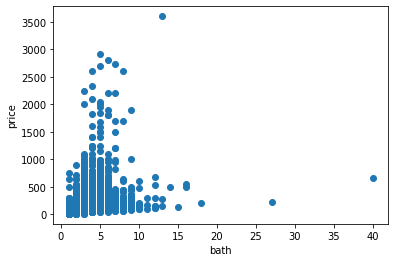

In [ ]:
plt.scatter(data['bath'],data['price'])
plt.xlabel('bath')
plt.ylabel('price')
plt.show()

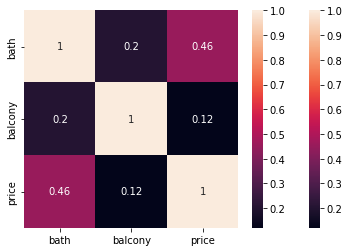

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, )
plt.show()


#Identifying missing values

In [ ]:
data.isnull().sum()

area_type         0
availability      0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

#Filling all missing values using Mean, median or Mode

In [ ]:
x = data['balcony'].mean()
data['balcony'].fillna(x, inplace = True)

x = data['bath'].mean()
data['bath'].fillna(x, inplace = True)



In [ ]:
#Applying label encoding in ord_2 column(labe)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['area_type'] = le.fit_transform(data['area_type'])

In [ ]:
#Applying label encoding in ord_2 column(labe)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['availability'] = le.fit_transform(data['availability'])

In [ ]:
#Applying label encoding in ord_2 column(labe)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['total_sqft'] = le.fit_transform(data['total_sqft'])

In [ ]:
data.head()

,area_type,availability,total_sqft,bath,balcony,price
0,3,40,70,2.0,1.0,39.07
1,2,80,1288,5.0,3.0,120.00
2,0,80,514,2.0,3.0,62.00
3,3,80,602,3.0,1.0,95.00
4,3,80,239,2.0,1.0,51.00


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#Splitting dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting linear regression to our training set to train our model

In [ ]:
#Fitting Linear regression to our training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Testing
y_pred = multiple_reg.predict(X_test)

In [ ]:
#Calculating the coefficients
multiple_reg.coef_

array([ 3.79221564e-01, -5.85420292e-02,  3.82363314e-02,  4.86789138e+01,
        6.64472886e+00])

In [ ]:
#Calculating the intercept
multiple_reg.intercept_

-54.762298499453294

In [ ]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.21636472151848962

In [ ]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
area_type = float(input("area_type : "))
availability = float(input("availability : "))
total_sqft = float(input("total_sqft : "))
bath = float(input("bath : "))
balcony = float(input("balcony : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[area_type,availability,total_sqft,bath,balcony]])
print("you will get Rs{:.2f} sales by advertising Rs{} on area_type, Rs{} on availability, Rs{} on total_sqft,Rs{} on bath,Rs{} on balcony."\
      .format(output[0][0] if output else "not predictable",area_type,availability,total_sqft))

Enter the ammount you will invest on:
area_type : 3
availability : 70
total_sqft : 40
bath : 2.0
balcony : 1.0


IndexError: ignored

In [ ]:
output =  multiple_reg.predict([[3,40,70,2.0,1.0]])
output

array([50.7127846])